In [176]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy

In [177]:
mat_data = scipy.io.loadmat('datos.mat')  # Reemplaza con la ruta a tu archivo .mat


# Asegúrate de que Altura y T_medidas sean arrays de numpy
Altura = np.array(mat_data['Altura'])
T_medidas = np.array(mat_data['T_medidas'])

# Verifica la forma de los datos
print("Forma de Altura:", Altura.shape)
print("Forma de T_medidas:", T_medidas.shape)

# Si T_medidas es una lista de listas, conviértela en DataFrame
df_t_medidas = pd.DataFrame(T_medidas)

t_mean = pd.DataFrame({"Mean" : df_t_medidas.mean()})
t_error = pd.DataFrame({"Error" : df_t_medidas.std()})

# Asegúrate de que Altura sea un array unidimensional
if Altura.ndim > 1:
    Altura = Altura.ravel()

# Crea el DataFrame de Altura
df_altura = pd.DataFrame({"Altura": Altura})

df = pd.concat([df_altura, t_mean, t_error, df_t_medidas], axis=1)

df.head()




Forma de Altura: (1, 33)
Forma de T_medidas: (10, 33)


,Altura,Mean,Error,0,1,2,3,4,5,6,...,23,24,25,26,27,28,29,30,31,32
0,12.0,218.938752,2.429846,216.350140,215.531029,220.969930,215.627514,217.374740,219.750113,216.432864,...,266.120570,266.840865,263.505881,269.338794,269.269579,265.744915,266.997268,258.637604,245.623023,238.656237
1,13.5,216.910939,2.088842,219.310961,214.581802,220.034325,216.721872,219.845607,220.904571,214.566921,...,268.429587,262.886937,268.366822,269.555225,273.425247,266.617185,263.327370,249.401185,247.916212,241.669642
2,15.0,217.903049,2.825441,214.925530,216.431399,215.442202,215.142925,218.970931,218.128344,215.192685,...,263.119561,267.527848,268.836433,266.887681,265.411281,264.032955,264.142238,256.058471,247.700333,239.770831
3,16.5,216.099440,1.979720,222.126393,216.861608,217.420869,215.528011,218.803860,218.262151,217.642332,...,267.949177,265.628393,266.809605,271.352466,268.785018,267.833021,258.246804,260.831180,250.598496,242.146805
4,18.0,217.605889,1.881230,219.015299,221.367487,214.255277,212.971302,217.639388,218.592138,214.184099,...,262.966227,265.499297,272.684499,265.937261,268.472295,265.774916,262.240000,253.597582,249.195090,237.397690


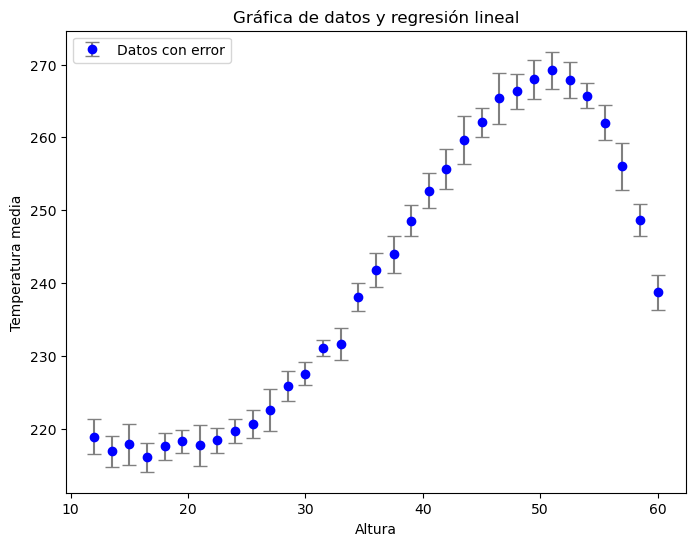

In [178]:
x = df.Altura
y = df.Mean
y_err = df.Error
# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', color='blue', ecolor='gray', capsize=5, label='Datos con error')

# Etiquetas y título
plt.xlabel('Altura')
plt.ylabel('Temperatura media')
plt.title('Gráfica de datos y regresión lineal')
plt.legend()

In [179]:
h_mean = (df_altura.Altura * t_mean.Mean).sum() / t_mean.Mean.sum()


In [180]:
Altura.size

33

Iteration 1: MSE = 7683.828130700656
Valores actualizados: [ 2.00000013e+02  9.09847508e-01 -1.76633814e-01 -6.38562992e-02
  1.41391305e+00]


C:\Users\maris\AppData\Local\Temp\ipykernel_3424\3393727181.py:25: RuntimeWarning: overflow encountered in scalar multiply
  gradients[j] = -2 * ((y - y_pred) * term).sum() / n


Iteration 101: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 201: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 301: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 401: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 501: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 601: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 701: MSE = nan
Valores actualizados: [ 1.51598880e+297 -7.55713397e+297              inf              nan
              inf]
Iteration 801: MSE = nan
Valores actualizados: [ 1.5159

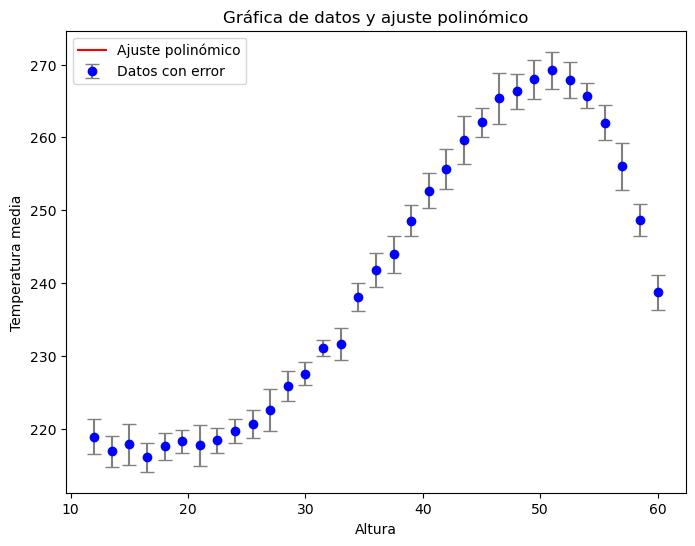

In [190]:
# Inicialización de parámetros
A = 200
B = 0.91
C = -0.18
D = 0.01
E = 2.5 * 0.0001
values = np.array([A, B, C, D, E])
learning_rate = 0.0000001  # Ajusta la tasa de aprendizaje
iterations = 1000  # Aumenta el número de iteraciones

# Gradiente descendente
for iteration in range(iterations):
    # Predicción
    y_pred = values[0] + values[1] * (x - h_mean) + values[2] * (x - h_mean)**2 + values[3] * (x - h_mean)**3 + values[4] * (x - h_mean)**4
    
    # Calcular el error cuadrático medio
    mse = np.mean((y - y_pred) ** 2)
    
    # Calcular el gradiente
    gradients = np.zeros_like(values)
    n = len(x)
    
    for j in range(values.size):
        term = (x - h_mean) ** j
        gradients[j] = -2 * ((y - y_pred) * term).sum() / n
    
    # Actualizar valores
    values -= learning_rate * gradients
    
    # Imprimir MSE y parámetros actualizados
    if iteration % 100 == 0:  # Imprimir cada 100 iteraciones
        print(f"Iteration {iteration + 1}: MSE = {mse}")
        print(f"Valores actualizados: {values}")

# Predicciones finales
y_pred_final = values[0] + values[1] * (x - h_mean) + values[2] * (x - h_mean)**2 + values[3] * (x - h_mean)**3 + values[4] * (x - h_mean)**4

# Crear la gráfica
plt.figure(figsize=(8, 6))
plt.errorbar(x, y, yerr=y_err, fmt='o', color='blue', ecolor='gray', capsize=5, label='Datos con error')
plt.plot(x, y_pred_final, color='red', label='Ajuste polinómico')

# Etiquetas y título
plt.xlabel('Altura')
plt.ylabel('Temperatura media')
plt.title('Gráfica de datos y ajuste polinómico')
plt.legend()
plt.show()
